In [2]:
import pandas as pd
df = pd.read_csv('/content/sample_data/ML_ASS/Real estate.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
Y = df['Y house price of unit area']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
correlation_matrix = df.corr()
correlation_matrix

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


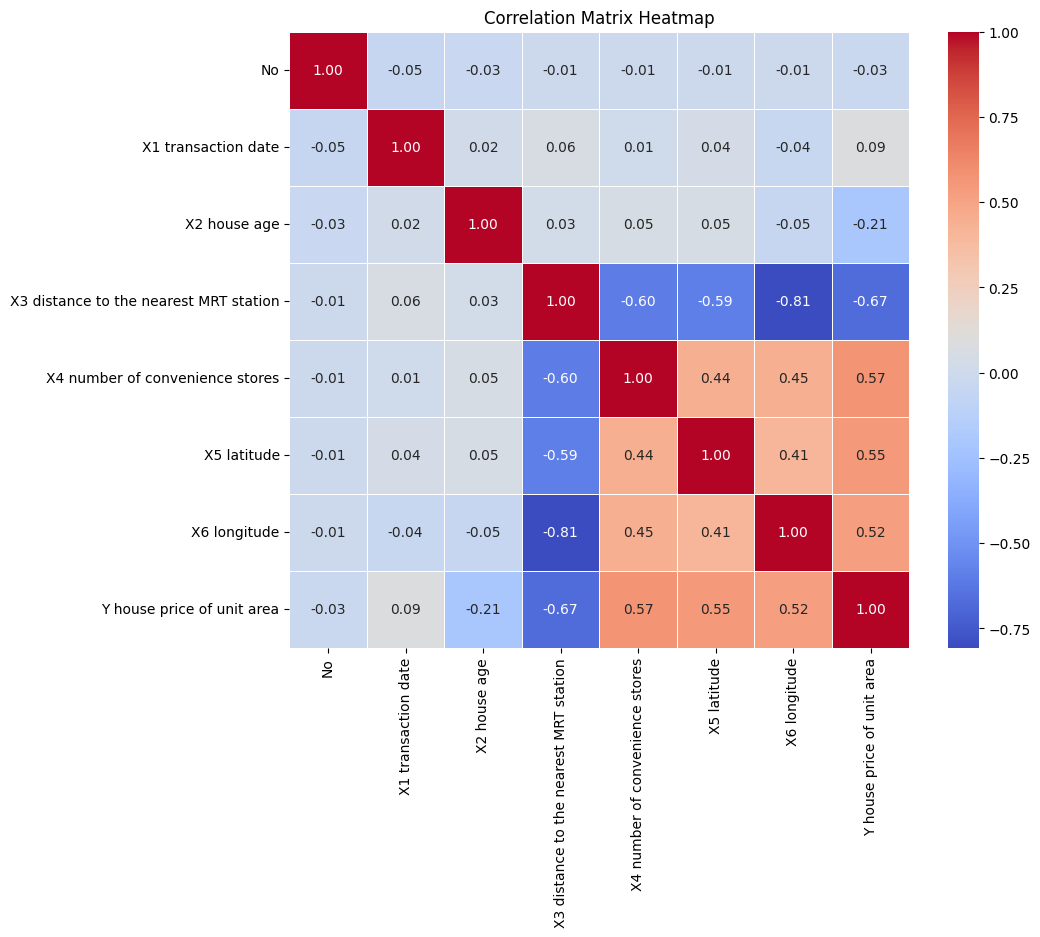

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
Y_pred = linear_regressor.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)

r2 = r2_score(Y_test, Y_pred)
mse, r2

(74.68529290899978, 0.553384715023661)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly, X_test_poly

(array([[1.00000000e+00, 2.01341700e+03, 2.03000000e+01, ...,
         8.27151980e+04, 1.72561500e+03, 3.60000000e+01],
        [1.00000000e+00, 2.01350000e+03, 1.52000000e+01, ...,
         1.42271919e+07, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 2.01266700e+03, 1.50000000e+00, ...,
         5.46757206e+02, 1.63679880e+02, 4.90000000e+01],
        ...,
        [1.00000000e+00, 2.01333300e+03, 1.08000000e+01, ...,
         6.37977678e+04, 2.52582200e+02, 1.00000000e+00],
        [1.00000000e+00, 2.01283300e+03, 4.60000000e+00, ...,
         6.74236791e+04, 1.55796420e+03, 3.60000000e+01],
        [1.00000000e+00, 2.01308300e+03, 1.10000000e+00, ...,
         3.74749586e+04, 1.16150700e+03, 3.60000000e+01]]),
 array([[1.00000000e+00, 2.01316700e+03, 1.10000000e+00, ...,
         3.74749586e+04, 1.16150700e+03, 3.60000000e+01],
        [1.00000000e+00, 2.01300000e+03, 1.32000000e+01, ...,
         2.42291653e+05, 2.46115650e+03, 2.50000000e+01],
        [1.00000000e+00, 

In [25]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, Y_train)
Y_pred_poly = poly_regressor.predict(X_test_poly)
mse_poly = mean_squared_error(Y_test, Y_pred_poly)
r2_poly = r2_score(Y_test, Y_pred_poly)
mse_poly, r2_poly

(60.669969111481514, 0.6371958321533899)

In [26]:
import matplotlib.pyplot as plt

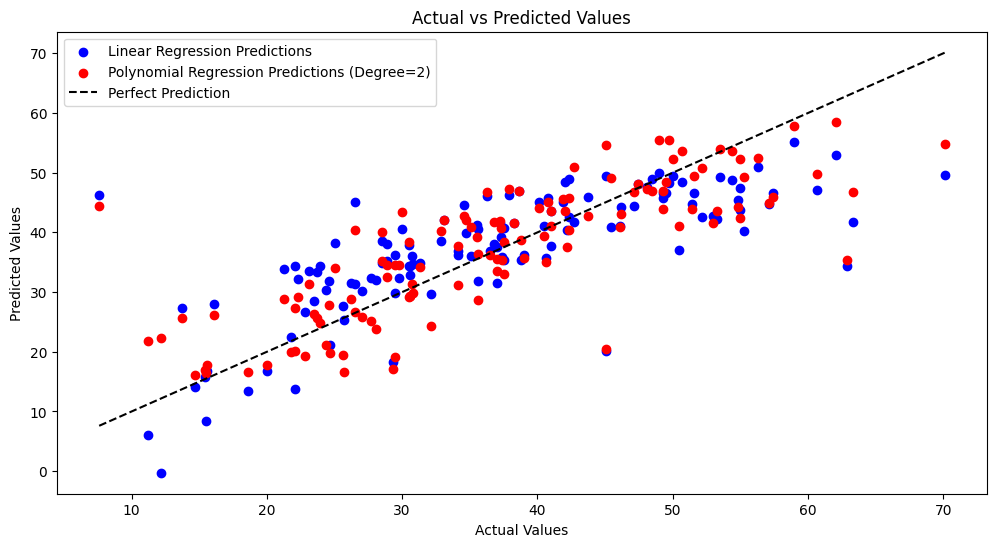

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Linear Regression Predictions')
plt.scatter(Y_test, Y_pred_poly, color='red', label='Polynomial Regression Predictions (Degree={})'.format(degree)) # Changed Y_poly_pred to Y_pred_poly
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()